# Train Data Loading

In [1]:
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer
import numpy as np
import pandas as pd
import regex as re
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import plotly.express as px
import plotly.graph_objects as go
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.preprocessing import OrdinalEncoder
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
df = pd.read_csv("twitter_training.csv")

In [3]:
# Label the columns
df.columns = ["tweet_id","place", "sentiments", "tweets"]
df = df.drop("place", axis=1)
df

,tweet_id,sentiments,tweets
0,2401,Positive,I am coming to the borders and I will kill you...
1,2401,Positive,im getting on borderlands and i will kill you ...
2,2401,Positive,im coming on borderlands and i will murder you...
3,2401,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Positive,im getting into borderlands and i can murder y...
...,...,...,...
74676,9200,Positive,Just realized that the Windows partition of my...
74677,9200,Positive,Just realized that my Mac window partition is ...
74678,9200,Positive,Just realized the windows partition of my Mac ...
74679,9200,Positive,Just realized between the windows partition of...


# Data Cleaning and Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    74681 non-null  int64 
 1   sentiments  74681 non-null  object
 2   tweets      73995 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
# Identify inconsistencies
#The code `duplicate_rows = df[df.duplicated()]` is identifying and storing the duplicate rows in the DataFrame `df`. The `df.duplicated()` function returns a boolean Series indicating whether each row is a duplicate or not. By passing this boolean Series as a filter to the DataFrame `df`, only the duplicate rows are selected and stored in the variable `duplicate_rows`.
duplicate_rows = df[df.duplicated()]
duplicate_rows

,tweet_id,sentiments,tweets
19,2404,Positive,that was the first borderlands session in a lo...
25,2405,Negative,The biggest disappointment of my life came a y...
50,2409,Neutral,Blaming Sight for Tardiness! A little bit of b...
63,2411,Neutral,.. [
145,2425,Negative,"""What a bitch!"""
...,...,...,...
74504,9171,Neutral,This benchmarking comparison between Oculus Qu...
74509,9172,Positive,@ NVIDIAGeForce @ nvidia
74588,9185,Neutral,Heard people are having issues with ordering t...
74618,9190,Positive,This news about the Nvidia 3000 series is ligi...


In [6]:
# Identify missing values
#The code is calculating the number of missing values in each column of the DataFrame `df`. It uses the `isna()` method to check for missing values and the `sum()` method to calculate the total number of missing values in each column. The result is stored in the variable `missing_values`.
missing_values = df.isna().sum()
missing_values

tweet_id        0
sentiments      0
tweets        686
dtype: int64

In [7]:
# removing duplicates

df.drop_duplicates(inplace = True)

# Remove the duplicate rows
df = df.drop_duplicates()

df['tweets'] = df['tweets'].astype(str)



stopw = set(stopwords.words("english"))

print(stopw)
df["tweets"] = df['tweets'].apply(lambda x: ' '.join(
    [word.lower() for word in x.split() if word.lower() not in stopw]))


def convert_list_to_str(l):
    st = ""
    for i in l:
        st = st+i+" "
    st = st[:-1]
    return st


tokenizer = RegexpTokenizer(r'\w+|\d+')
df["tweets_new"] = df["tweets"].apply(tokenizer.tokenize)
df["tweets_new"] = df["tweets_new"].apply(convert_list_to_str)


df

{'their', "you're", 'if', 'very', 'but', 'or', 'wasn', 'such', "mightn't", 'above', 'themselves', 'why', "should've", 'of', 'you', 'we', 'aren', "doesn't", "haven't", "needn't", 'here', 'when', 'than', 'll', 'was', 'wouldn', 'weren', 'with', 'those', 'the', 'most', "couldn't", 'y', 'being', 'just', 'did', 'should', 'o', 'which', 'ain', "weren't", 'hadn', 'during', 'doesn', 'out', 'himself', 'other', 'a', 'all', 'won', 'herself', "you've", 'his', 'needn', 'some', 'because', 'for', 'didn', 're', 'be', 'further', 'haven', "it's", 'off', "you'd", 'to', 't', 'myself', 'doing', "that'll", 'up', "won't", 'any', 's', 'me', 'have', 'and', 'theirs', 'more', 'only', 'does', 'no', 'by', 've', "aren't", "hasn't", 'until', "you'll", 'i', 'in', 'while', 'yours', "didn't", 'mightn', 'an', 'how', 'can', "hadn't", 'been', 'where', 'own', 'both', 'couldn', 'isn', 'had', 'shouldn', 'don', "shouldn't", 'into', 'there', 'were', 'do', 'ma', 'mustn', 'as', 'yourself', 'each', 'at', 'between', 'ours', "wasn't"

,tweet_id,sentiments,tweets,tweets_new
0,2401,Positive,"coming borders kill all,",coming borders kill all
1,2401,Positive,"im getting borderlands kill all,",im getting borderlands kill all
2,2401,Positive,"im coming borderlands murder all,",im coming borderlands murder all
3,2401,Positive,"im getting borderlands 2 murder all,",im getting borderlands 2 murder all
4,2401,Positive,"im getting borderlands murder all,",im getting borderlands murder all
...,...,...,...,...
74676,9200,Positive,realized windows partition mac like 6 years be...,realized windows partition mac like 6 years be...
74677,9200,Positive,realized mac window partition 6 years behind n...,realized mac window partition 6 years behind n...
74678,9200,Positive,realized windows partition mac 6 years behind ...,realized windows partition mac 6 years behind ...
74679,9200,Positive,realized windows partition mac like 6 years be...,realized windows partition mac like 6 years be...


In [8]:

lemmatizer = WordNetLemmatizer()


def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no mapping found


def lemmatize_sentence(sentence):
    # tokenizer = RegexpTokenizer(r'\w+')
    # words = word_tokenize(sentence)
    words = sentence.split()
    pos_tags = nltk.pos_tag(words)
    lemmatizer = WordNetLemmatizer()

    lemmatized_words = [lemmatizer.lemmatize(
        word, get_wordnet_pos(pos_tag)) for word, pos_tag in pos_tags]
    return ' '.join(lemmatized_words)


def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df["tweets_new"] = df["tweets_new"].apply(lemmatize_sentence)
print(df)

df["tweets"] = df["tweets_new"]

# df["tweets"] = df["tweets_new"].apply(convert_list_to_str)
df = df.drop(columns=["tweets_new"])
# print(df)

#fill 0 in mum
df['tweets'] = df['tweets'].fillna(0)

# Save the dataframe
df.to_csv("tweet_clean.csv", index=False)
df


       tweet_id sentiments                                             tweets  \
0          2401   Positive                           coming borders kill all,   
1          2401   Positive                   im getting borderlands kill all,   
2          2401   Positive                  im coming borderlands murder all,   
3          2401   Positive               im getting borderlands 2 murder all,   
4          2401   Positive                 im getting borderlands murder all,   
...         ...        ...                                                ...   
74676      9200   Positive  realized windows partition mac like 6 years be...   
74677      9200   Positive  realized mac window partition 6 years behind n...   
74678      9200   Positive  realized windows partition mac 6 years behind ...   
74679      9200   Positive  realized windows partition mac like 6 years be...   
74680      9200   Positive  like windows partition mac like 6 years behind...   

                           

,tweet_id,sentiments,tweets
0,2401,Positive,come border kill all
1,2401,Positive,im get borderland kill all
2,2401,Positive,im come borderland murder all
3,2401,Positive,im get borderland 2 murder all
4,2401,Positive,im get borderland murder all
...,...,...,...
74676,9200,Positive,realize window partition mac like 6 year behin...
74677,9200,Positive,realize mac window partition 6 year behind nvi...
74678,9200,Positive,realize window partition mac 6 year behind nvi...
74679,9200,Positive,realize window partition mac like 6 year behin...


In [9]:
#check for duplicates
df.duplicated().sum()

7133

In [10]:
#check null
df['tweets'].isnull().sum()

0

# Exploratory data analysis (EDA)

In [11]:
#`df.describe().T` is transposing the output of the `describe()` method on a DataFrame `df`. The `describe()` method provides summary statistics of the numerical columns in the DataFrame, such as count, mean, standard deviation, minimum, maximum, and quartiles. By applying `.T` after `describe()`, the output is transposed, meaning the rows become columns and vice versa. This can be useful for better readability or for further analysis of the summary statistics.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,71981.0,6437.452383,3743.194317,1.0,3199.0,6434.0,9607.0,13200.0


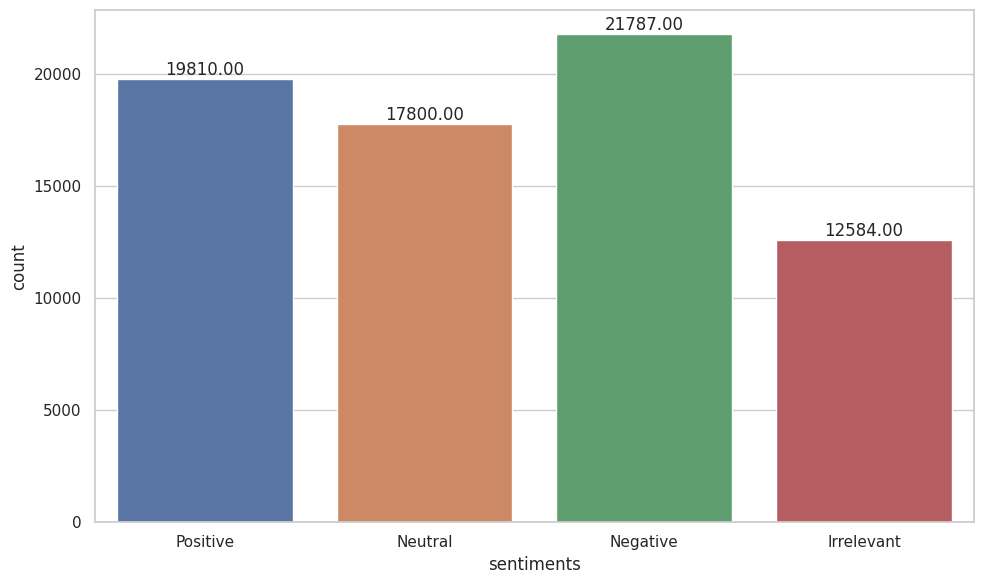

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiments', data=df)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')
plt.tight_layout()
plt.show()


In [13]:


df_copy = df.copy()

ordinal_encoder = OrdinalEncoder()

# Every single column with categorical values will be converted.
object_cols = ['sentiments']
df_copy[object_cols] = df_copy[object_cols].astype(str)

df_copy[object_cols] = ordinal_encoder.fit_transform(df_copy[object_cols])

df_copy.head()

ordinal_encoder = OrdinalEncoder()

# Every single column with categorical values will be converted.
object_cols = ['tweet_id', 'sentiments', 'tweets']
df[object_cols] = df[object_cols].astype(str)

df[object_cols] = ordinal_encoder.fit_transform(df[object_cols])

df.head()


,tweet_id,sentiments,tweets
0,4254.0,3.0,10535.0
1,4254.0,3.0,28069.0
2,4254.0,3.0,28038.0
3,4254.0,3.0,28068.0
4,4254.0,3.0,28070.0


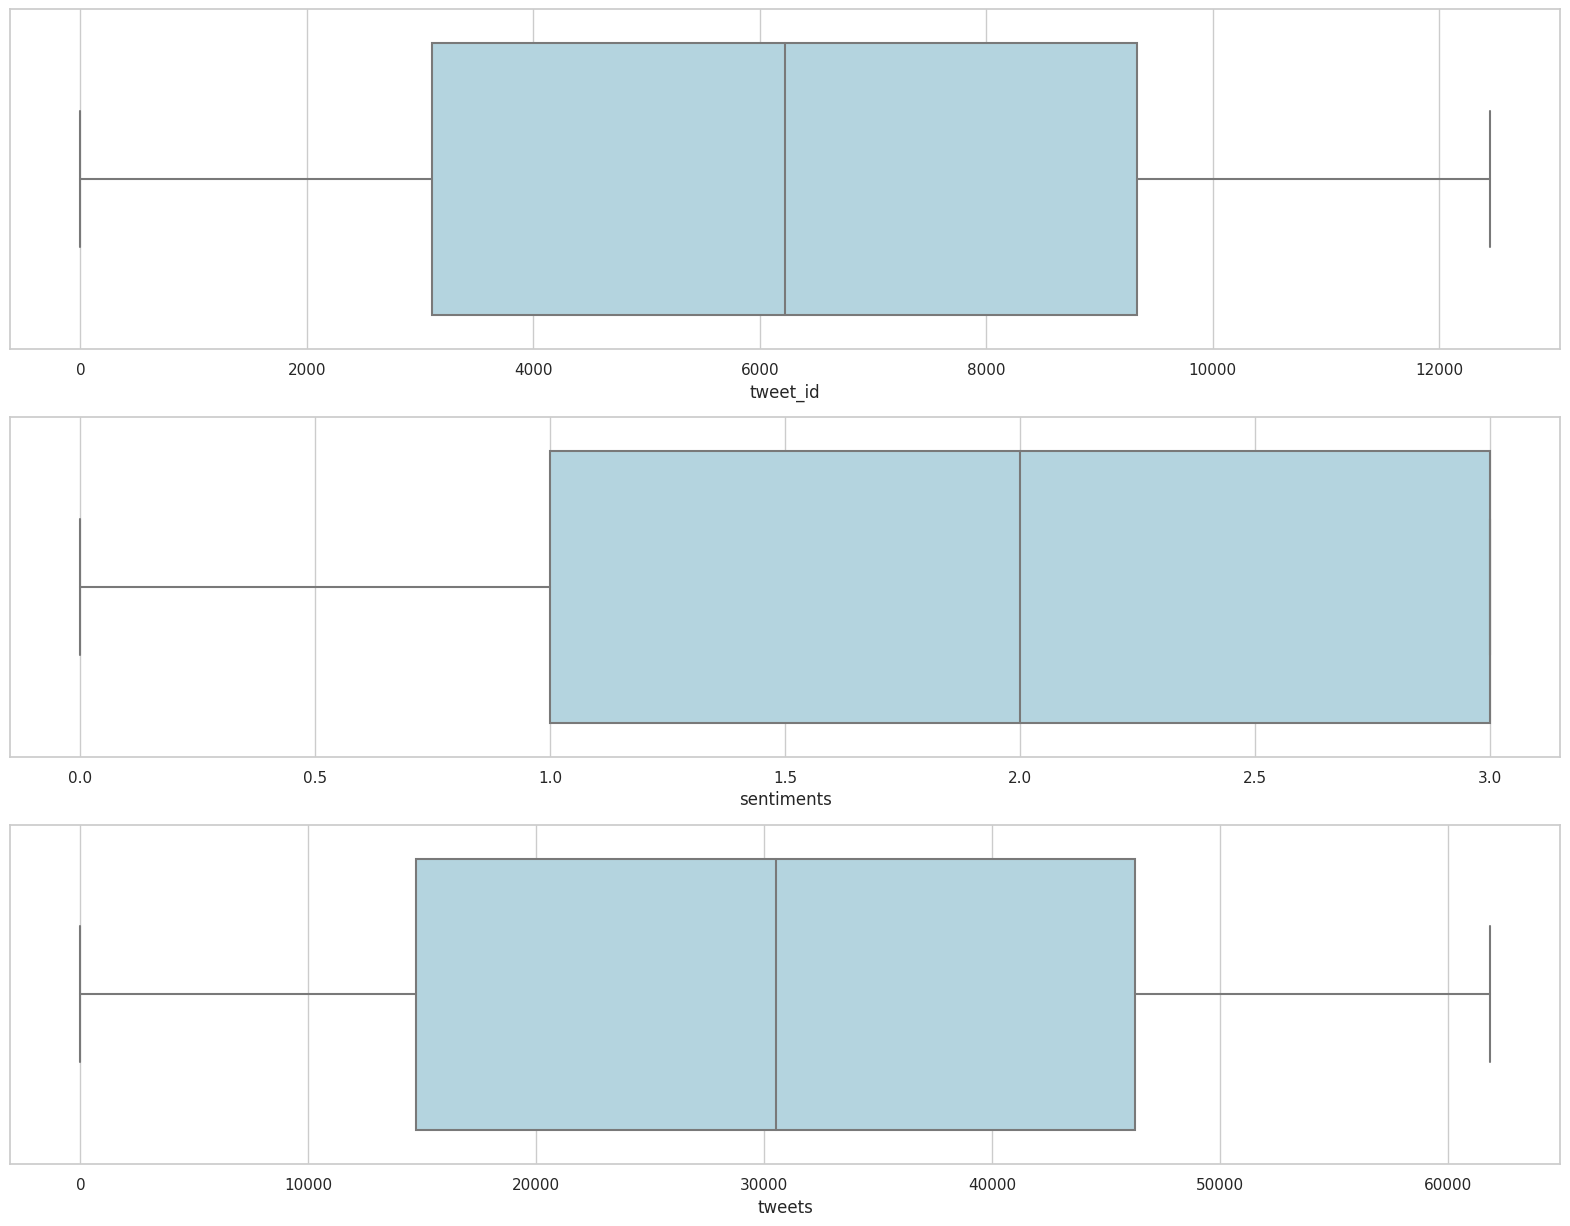

In [14]:

plt.figure(figsize= (20,15))

plt.subplot(3,1,1)
sns.boxplot(x= df['tweet_id'], color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= df['sentiments'], color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= df['tweets'], color='lightblue')

plt.show()


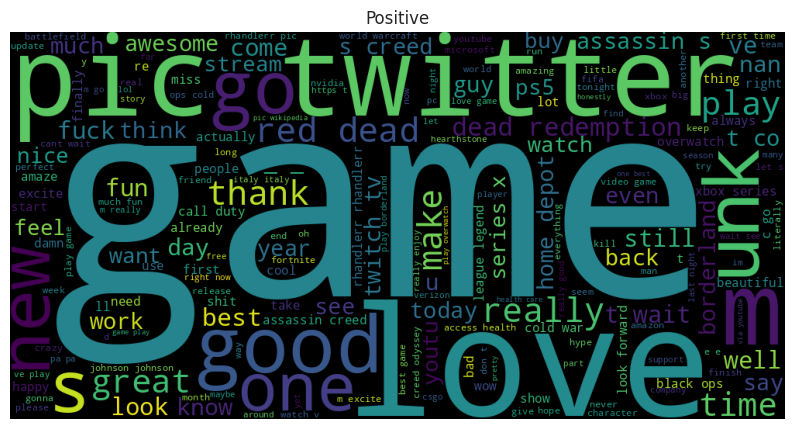

In [15]:


# Load the cleaned data
clean_df = pd.read_csv("tweet_clean.csv")

# Extract the sentiment words
positive_words = clean_df[clean_df['sentiments'] == 'Positive']['tweets'].tolist()
positive_words = [str(word) for word in positive_words]
positive_wordcloud = WordCloud(width=1000, height=500).generate(' '.join(positive_words))

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.title('Positive')
plt.show()


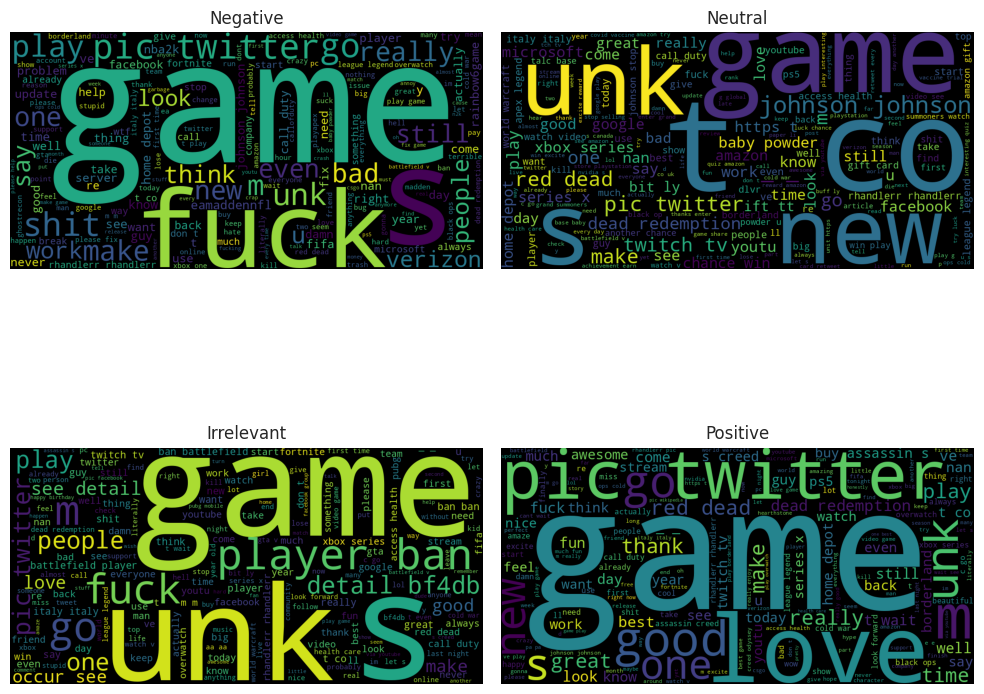

In [16]:
# Extract the sentiment words

negative_words = clean_df[clean_df['sentiments'] == 'Negative']['tweets'].tolist()
neutral_words = clean_df[clean_df['sentiments'] == 'Neutral']['tweets'].tolist()
irrelevant_words = clean_df[clean_df['sentiments'] == 'Irrelevant']['tweets'].tolist()

negative_words = [str(word) for word in negative_words]
neutral_words = [str(word) for word in neutral_words]
irrelevant_words = [str(word) for word in irrelevant_words]


negative_wordcloud = WordCloud(width=1000, height=500).generate(' '.join(negative_words))
neutral_wordcloud = WordCloud(width=1000, height=500).generate(' '.join(neutral_words))
irrelevant_wordcloud = WordCloud(width=1000, height=500).generate(' '.join(irrelevant_words))

# Display the word clouds
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(negative_wordcloud)
plt.axis('off')
plt.title('Negative')

plt.subplot(2, 2, 2)
plt.imshow(neutral_wordcloud)
plt.axis('off')
plt.title('Neutral')

plt.subplot(2, 2, 3)
plt.imshow(irrelevant_wordcloud)
plt.axis('off')
plt.title('Irrelevant')

plt.subplot(2, 2, 4)
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.title('Positive')

plt.tight_layout()
plt.show()


In [18]:
print(df['sentiments'].nunique())

4


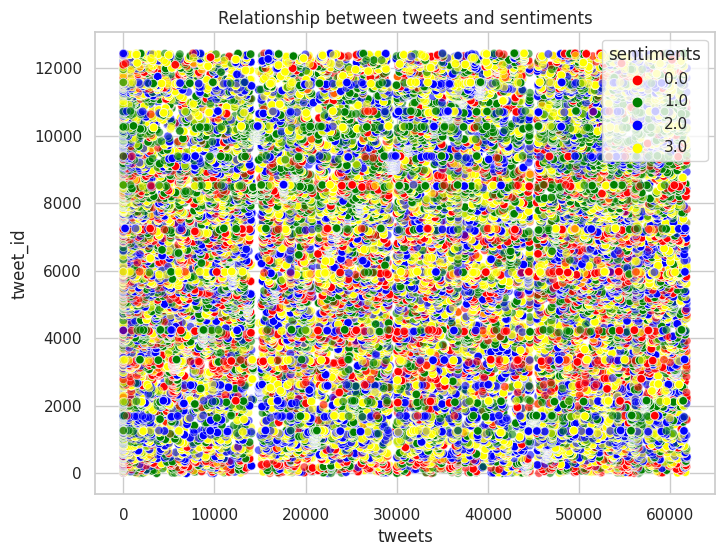

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.tweets, y=df.tweet_id,hue=df.sentiments,palette= ['red','green','blue', 'yellow'] ,alpha=0.6)
plt.title("Relationship between tweets and sentiments")
plt.show()

In [20]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 92.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.4 MB/s eta 0:00:00


In [21]:
!pip install tensorflow

# BERT-CNN IMPLEMENTATION

In [22]:
import re
import numpy as np
# import emoji as emoji
import string
import pandas as pd
from transformers import BertTokenizer

In [23]:
def data_process(data, labels):
    input_ids = []
    attention_masks = []
    bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    for sentence in data:
        bert_inp = bert_tokenizer.__call__(sentence, max_length=36,
                                           padding='max_length', pad_to_max_length=True,
                                           truncation=True, return_token_type_ids=False)

        input_ids.append(bert_inp['input_ids'])
        attention_masks.append(bert_inp['attention_mask'])
    input_ids = np.asarray(input_ids)
    attention_masks = np.array(attention_masks)
    labels = np.array(labels)
    return input_ids, attention_masks, labels



In [24]:
df_copy.head()

,tweet_id,sentiments,tweets
0,2401,3.0,come border kill all
1,2401,3.0,im get borderland kill all
2,2401,3.0,im come borderland murder all
3,2401,3.0,im get borderland 2 murder all
4,2401,3.0,im get borderland murder all


In [25]:
# return input_ids, attention_masks, labels
input_ids, attention_masks, labels = data_process(df_copy["tweets"], df_copy["sentiments"])


input_ids.shape

(71981, 36)

# BERT CNN Model Defination

In [26]:
import gc

import torch
from torch import nn
from transformers import BertModel


class BERT_CNN(nn.Module):

    def __init__(self, num_classes):
        super(BERT_CNN, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.conv = nn.Conv2d(in_channels=1, out_channels=13, kernel_size=(3, 768), padding=(1, 0))
        self.bn = nn.BatchNorm2d(13) 
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=(3, 1), stride=1)
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(442, num_classes)  
        self.flat = nn.Flatten()
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, sent_id, mask):
        cls_hs = self.bert(input_ids=sent_id, attention_mask=mask, return_dict=False, output_hidden_states=True)
        x = cls_hs[0].unsqueeze(1)  
        x = self.conv(x)
        x = self.bn(x) 
        del cls_hs
        gc.collect()
        torch.cuda.empty_cache()
        x = self.relu(x)
        x = self.pool(x)
        x = self.flat(x)
        x = self.fc(x)
        return self.softmax(x)


In [27]:
input_ids.shape

(71981, 36)

In [28]:
dataset = pd.DataFrame({'input_ids': list(input_ids), 'attention_masks': list(attention_masks)}, columns=['input_ids', 'attention_masks'])
dataset

,input_ids,attention_masks
0,"[101, 2272, 3675, 3102, 2035, 102, 0, 0, 0, 0,...","[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[101, 10047, 2131, 3675, 3122, 3102, 2035, 102...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[101, 10047, 2272, 3675, 3122, 4028, 2035, 102...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[101, 10047, 2131, 3675, 3122, 1016, 4028, 203...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ..."
4,"[101, 10047, 2131, 3675, 3122, 4028, 2035, 102...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
71976,"[101, 5382, 3332, 13571, 6097, 2066, 1020, 209...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
71977,"[101, 5382, 6097, 3332, 13571, 1020, 2095, 236...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
71978,"[101, 5382, 3332, 13571, 6097, 1020, 2095, 236...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
71979,"[101, 5382, 3332, 13571, 6097, 2066, 1020, 209...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [29]:
dataset.columns

Index(['input_ids', 'attention_masks'], dtype='object')

In [30]:
labels = labels.astype(np.int64)
labels

array([3, 3, 3, ..., 3, 3, 3])

In [31]:
(labels.astype(np.int64)).dtype

dtype('int64')

In [32]:
import gc
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from transformers import AutoModel
import pandas as pd

train_text, temp_text, train_labels, temp_labels = train_test_split(dataset, labels,
                             random_state=2018, test_size=0.2, stratify=labels)

val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                         random_state=2018, test_size=0.5, stratify=temp_labels)

del temp_text
gc.collect()
torch.cuda.empty_cache()
train_count = len(train_labels)
test_count = len(test_labels)
val_count = len(val_labels)

# import BERT-base pre-trained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# for train set
train_seq = torch.tensor(train_text['input_ids'].tolist())
train_mask = torch.tensor(train_text['attention_masks'].tolist())
train_y = torch.tensor(train_labels.tolist())

# for validation set
val_seq = torch.tensor(val_text['input_ids'].tolist())
val_mask = torch.tensor(val_text['attention_masks'].tolist())
val_y = torch.tensor(val_labels.tolist())

# for test set
test_seq = torch.tensor(test_text['input_ids'].tolist())
test_mask = torch.tensor(test_text['attention_masks'].tolist())
test_y = torch.tensor(test_labels.tolist())


from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler


batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# Random sampling
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# Validation sampler
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

# freeze parameters in bert
for param in bert.parameters():
    param.requires_grad = False

# model defination
model = BERT_CNN(num_classes=4)


device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

# optimizer 
from transformers import AdamW
optimizer = AdamW(model.parameters(), lr=2e-5)

#Loss definition
cross_entropy = nn.CrossEntropyLoss()

# set initial loss to infinite
best_valid_loss = float('inf')


# Accuracy Functions
def get_accuracy_per_batch(oglabels, predlabels):
  count = 0
  for i in range(len(oglabels)):
    if oglabels[i] == predlabels[i]:
      count+=1

  return count/len(oglabels)

def get_total_accuracy(acc_list):
  return sum(acc_list)/len(acc_list)


# function to train the model
def train():
    model.train()
    total_loss, total_accuracy = 0, 0
    total_preds = []
    accuracy = 0
    total = len(train_dataloader)
    acc_list = []
    for i, batch in enumerate(train_dataloader):
        step = i+1
        percent = "{0:.2f}".format(100 * (step / float(total)))
        lossp = "{0:.2f}".format(total_loss/(total*batch_size))
        filledLength = int(100 * step // total)
        bar = '█' * filledLength + '>'  *(filledLength < 100) + '.' * (99 - filledLength)
        print(f'\rBatch {step}/{total} |{bar}| {percent}% complete, loss={lossp}, accuracy={accuracy}', end='')
        # push the batch to gpu
        batch = [r.to(device) for r in batch]
        sent_id, mask, labels = batch
        del batch
        gc.collect()
        torch.cuda.empty_cache()
        # clear previously calculated gradients
        model.zero_grad()
        # get model predictions for the current batch

        preds = model(sent_id.to(device).long(), mask)
        predicted_labels = torch.argmax(preds, dim=1)

        # print(f"Predictions are : {predicted_labels}")
        # print(f"Labels are : {labels}")
        accuracy = get_accuracy_per_batch(labels, predicted_labels)
        acc_list.append(accuracy)
        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)
        # print(f"Loss {loss}, loss item: {loss.item}")
        # add on to the total loss
        total_loss += float(loss.item())
        # backward pass to calculate the gradients
        loss.backward()
        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        # update parameters
        optimizer.step()
        # model predictions are stored on GPU. So, push it to CPU
        # append the model predictions
        total_preds.append(preds.detach().cpu().numpy())
        # break

    gc.collect()
    torch.cuda.empty_cache()

    # compute the training loss of the epoch
    avg_loss = total_loss / (len(train_dataloader)*batch_size)

    # avg accuracy
    total_accuracy = get_total_accuracy(acc_list)

    # predictions are in the form of (no. of batches, size of batch, no. of classes).
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)

    # returns the loss and predictions
    return avg_loss, total_preds, total_accuracy



# function for evaluating the model
def evaluate():
    print("\n\nEvaluating...")
    model.eval()
    total_loss, total_accuracy = 0, 0
    accuracy = 0
    total_preds = []
    acc_list = []
    # iterate over batches
    total = len(val_dataloader)
    for i, batch in enumerate(val_dataloader):
        step = i+1
        percent = "{0:.2f}".format(100 * (step / float(total)))
        lossp = "{0:.2f}".format(total_loss/(total*batch_size))
        filledLength = int(100 * step // total)
        bar = '█' * filledLength + '>' * (filledLength < 100) + '.' * (99 - filledLength)
        print(f'\rBatch {step}/{total} |{bar}| {percent}% complete, loss={lossp}, accuracy={accuracy}', end='')
        # push the batch to gpu
        batch = [t.to(device) for t in batch]
        sent_id, mask, labels = batch
        del batch
        gc.collect()
        torch.cuda.empty_cache()
        # deactivate autograd
        with torch.no_grad():
            # model predictions
            preds = model(sent_id, mask)
            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds, labels)
            total_loss += float(loss.item())
            total_preds.append(preds.detach().cpu().numpy())
            predicted_labels = torch.argmax(preds, dim=1)


            accuracy = get_accuracy_per_batch(labels, predicted_labels)
            acc_list.append(accuracy)

    gc.collect()
    torch.cuda.empty_cache()
    # compute the validation loss of the epoch
    avg_loss = total_loss / (len(val_dataloader)*batch_size)
    # avg accuracy
    total_accuracy = get_total_accuracy(acc_list)
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)
    return avg_loss, total_preds, total_accuracy


print(device)


cuda


# Training and Validation Loop

In [33]:
import gc
import torch
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

best_accuracy = 0.0  # Initialize the best accuracy to a low value
best_model_state = None  # Store the state of the best model

# Define the number of epochs
epochs = 5
current = 1

# Training loop
while current <= epochs:
    print(f'\nEpoch {current} / {epochs}:')

    # Train model
    train_loss, _, train_acc = train()

    # Evaluate model
    valid_loss, _, valid_acc = evaluate()

    # Check if the current epoch's accuracy is the best so far
    if valid_acc > best_accuracy:
        best_accuracy = valid_acc
        best_model_state = model.state_dict()

    print(f'\n\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')
    print(f'\n\nTraining Accuracy: {train_acc:.3f}')
    print(f'Validation Accuracy: {valid_acc:.3f}')

    current = current + 1

# Save the model with the best accuracy
if best_model_state is not None:
    torch.save(best_model_state, 'bert_cnn_model.pth')

# Get predictions for test data
gc.collect()
torch.cuda.empty_cache()



Epoch 1 / 5:
Batch 1800/1800 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.00% complete, loss=0.03, accuracy=0.71875

Evaluating...
Batch 225/225 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.00% complete, loss=0.02, accuracy=0.8125

Training Loss: 0.031
Validation Loss: 0.022


Training Accuracy: 0.592
Validation Accuracy: 0.730

Epoch 2 / 5:
Batch 1800/1800 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.00% complete, loss=0.02, accuracy=0.8125

Evaluating...
Batch 225/225 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.00% complete, loss=0.01, accuracy=0.90625

Training Loss: 0.016
Validation Loss: 0.012


Training Accuracy: 0.809
Validation Accuracy: 0.853

Epoch 3 / 5:
Batch 1800/1800 |███████████████████████████████████████████████████████████

In [34]:
# Load the best model for evaluation
if best_model_state is not None:
    model.load_state_dict(best_model_state)

with torch.no_grad():
    preds = model(test_seq.to(device), test_mask.to(device))
    preds = preds.detach().cpu().numpy()

print("Performance:")
# Model's performance
preds = np.argmax(preds, axis=1)
print('Classification Report')
print(classification_report(test_y, preds))

print("Accuracy: " + str(accuracy_score(test_y, preds)))

Performance:
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1259
           1       0.85      0.96      0.90      2179
           2       0.92      0.89      0.91      1780
           3       0.94      0.87      0.90      1981

    accuracy                           0.90      7199
   macro avg       0.91      0.90      0.90      7199
weighted avg       0.91      0.90      0.90      7199

Accuracy: 0.9017919155438255
